In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("test")
print(test_labels.shape)
print(test_images.shape)

test
(10000, 10)
(10000, 28, 28)


In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()


model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [65]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                

In [66]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 271s 287ms/step - loss: 0.1849 - accuracy: 0.9486 - val_loss: 0.0746 - val_accuracy: 0.9771
Epoch 2/10
938/938 [==============================] - 256s 273ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0264 - val_accuracy: 0.9920
Epoch 3/10
938/938 [==============================] - 249s 266ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.0336 - val_accuracy: 0.9904
Epoch 4/10
938/938 [==============================] - 257s 274ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0251 - val_accuracy: 0.9919
Epoch 5/10
938/938 [==============================] - 278s 296ms/step - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.0480 - val_accuracy: 0.9866
Epoch 6/10
938/938 [==============================] - 258s 276ms/step - loss: 0.0255 - accuracy: 0.9925 - val_loss: 0.0415 - val_accuracy: 0.9893
Epoch 7/10
938/938 [==============================] - 265s 283ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0316 -

In [67]:
pred = model.predict(test_images);
print(pred.shape)

313/313 [==============================] - 9s 28ms/step
(10000, 10)


In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
print(test_labels[0])
print(pred.shape)
pred = np.argmax(pred, axis=1)
test_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(test_labels, pred)



[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(10000, 10)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       1.00      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



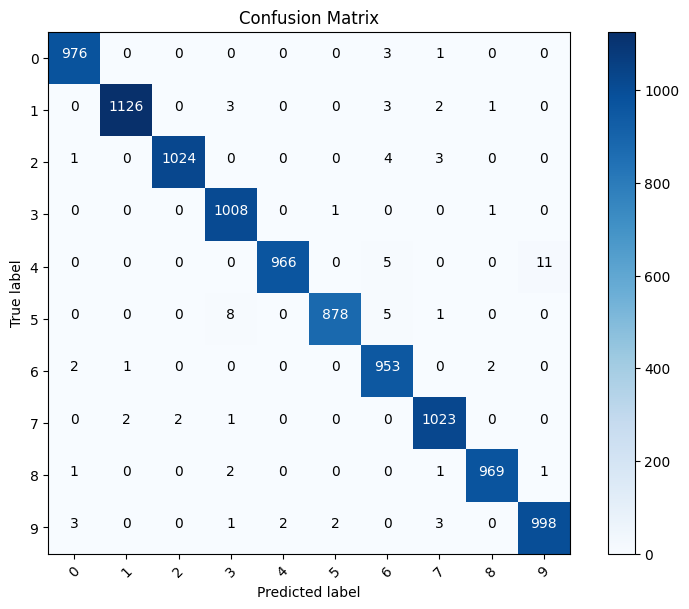

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

print(classification_report(test_labels, pred))
classes = np.unique(np.concatenate((test_labels, pred)))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
